# Data Analysis on Titanic Dataset 🚢🧊

## 1️⃣ Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

## 2️⃣ Read the Dataset 

In [2]:
path = r'Dataset\Titanic-Dataset.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3️⃣ Exploratory Data Analysis (EDA)

### Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Description

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


### Check Columns

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Remove unnecessary columns 

In [9]:
df.drop(columns=['PassengerId'], inplace=True)

### Check Missing Values

In [10]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Distribution Missing Values

In [11]:
values = (df.isna().sum() / df.shape[0]) * 100

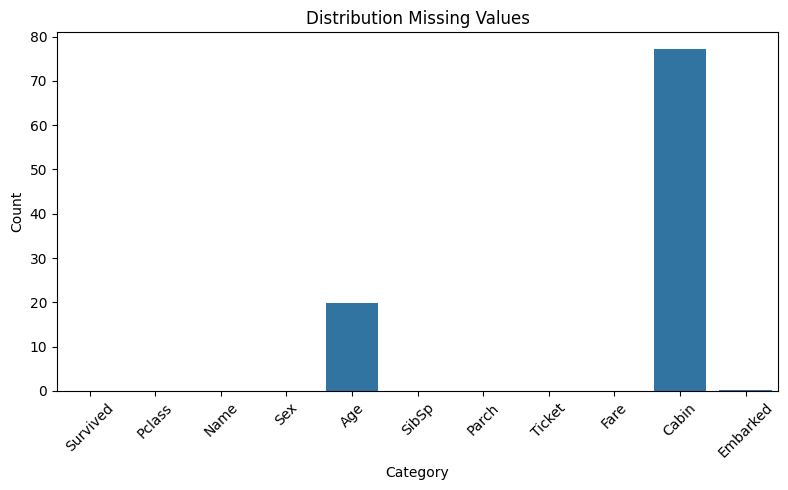

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=values.index, y=values.values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Fill Missing Values

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Check Duplication

In [15]:
df.duplicated().sum()

0

### Univariate Analysis

#### Column : Survived 

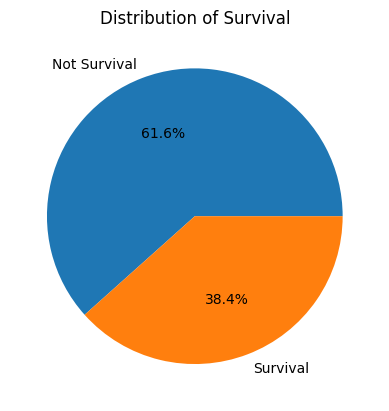

In [16]:
values = df['Survived'].value_counts()

plt.pie(
    values.values,
    labels=['Not Survival','Survival'],
    autopct='%1.1f%%',      
)
plt.title("Distribution of Survival")
plt.show()

#### Column : Pclass

In [17]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

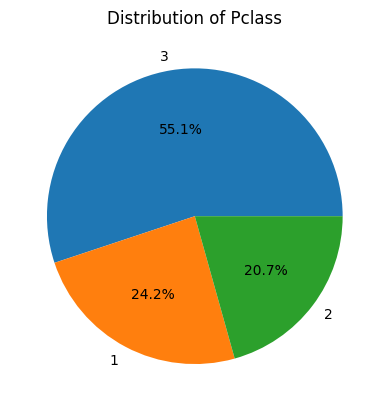

In [18]:
values = df['Pclass'].value_counts()

plt.pie(
    values.values,
    labels=values.index,
    autopct='%1.1f%%',      
)
plt.title("Distribution of Pclass")
plt.show()

#### Column : Sex

In [19]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

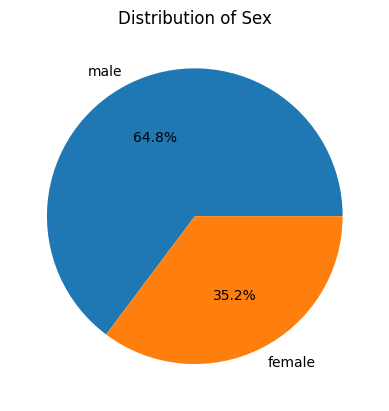

In [20]:
values = df['Sex'].value_counts()

plt.pie(
    values.values,
    labels=values.index,
    autopct='%1.1f%%',      
)
plt.title("Distribution of Sex")
plt.show()

#### Column : Age 

In [21]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80] 
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

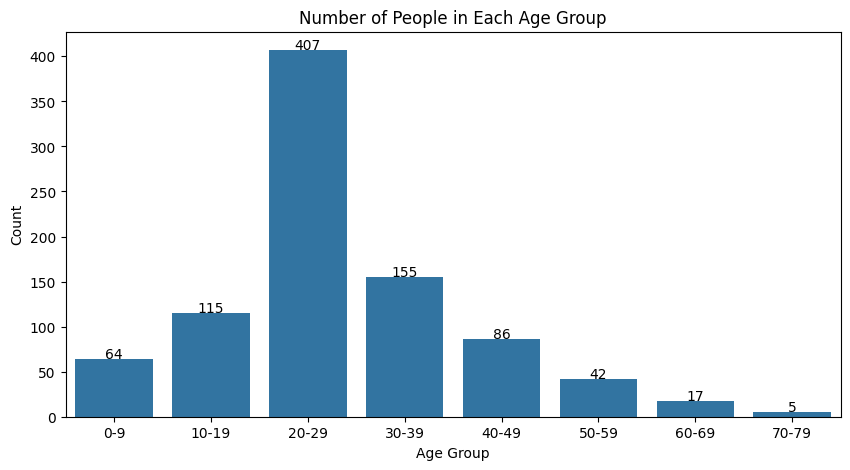

In [22]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='AgeGroup')

plt.title("Number of People in Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=int(height),                  
        ha='center'                     
    )

plt.show()

#### Columns : SibSp and Parch

In [23]:
df['Have_SibSp'] = df['SibSp'].apply(lambda x: 'have' if x > 0 else 'not have')
df['Have_Parch'] = df['Parch'].apply(lambda x: 'have' if x > 0 else 'not have')

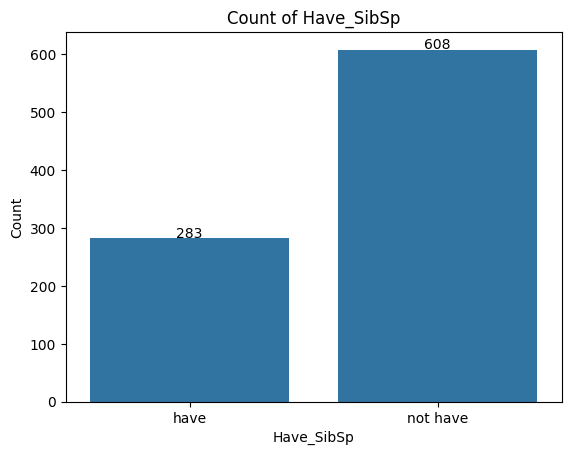

In [24]:
ax = sns.countplot(data=df, x='Have_SibSp')

plt.title("Count of Have_SibSp")
plt.xlabel("Have_SibSp")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=int(height),                  
        ha='center'                     
    )

plt.show()

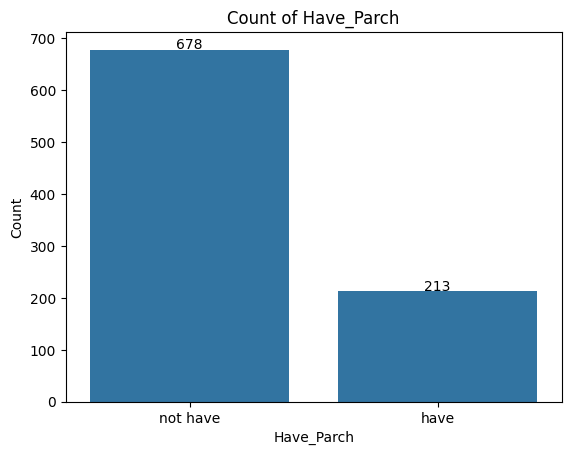

In [25]:
ax = sns.countplot(data=df, x='Have_Parch')

plt.title("Count of Have_Parch")
plt.xlabel("Have_Parch")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=int(height),                  
        ha='center'                     
    )

plt.show()

### Bivariate Analysis 

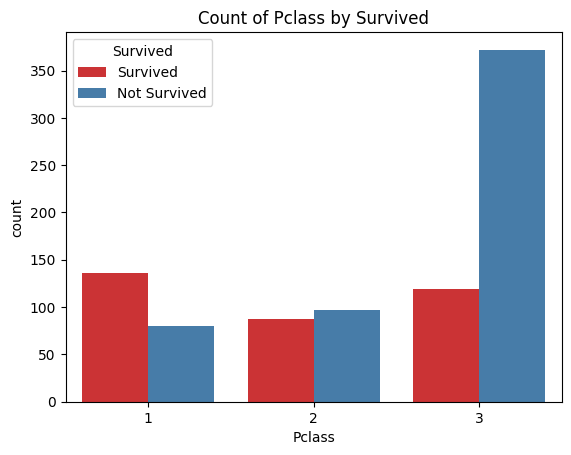

In [26]:
sns.countplot(data=df.assign(Survived=df['Survived'].map({0:'Not Survived', 1:'Survived'})),
              x='Pclass', hue='Survived', palette='Set1')
plt.title("Count of Pclass by Survived")
plt.show()

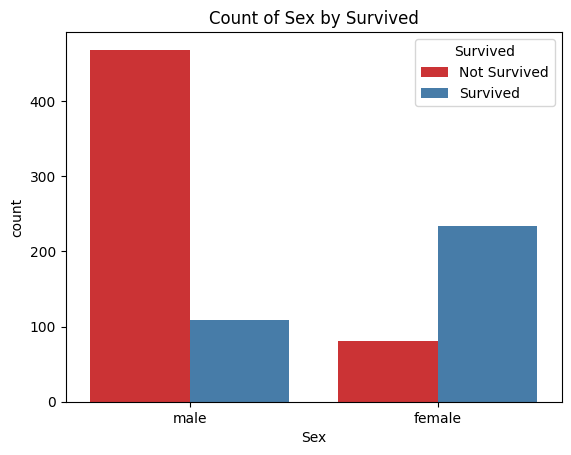

In [27]:
sns.countplot(data=df.assign(Survived=df['Survived'].map({0:'Not Survived', 1:'Survived'})), 
              x='Sex', hue='Survived', palette='Set1')
plt.title("Count of Sex by Survived")
plt.show()

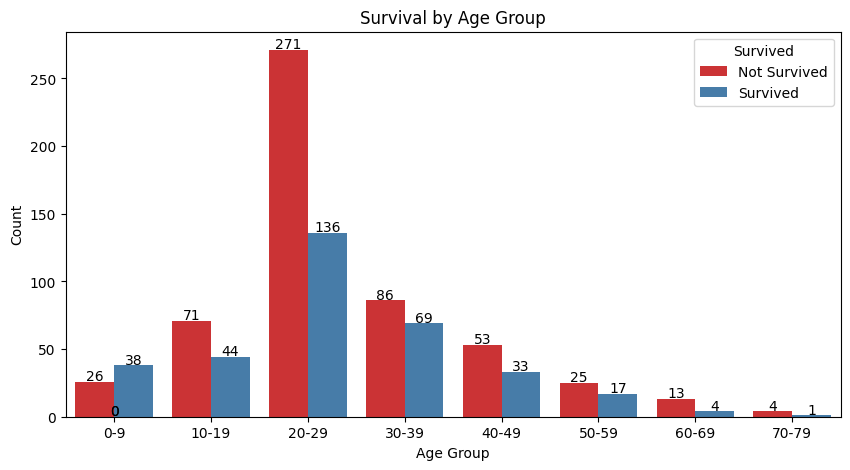

In [28]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df.assign(Survived=df['Survived'].map({0:'Not Survived', 1:'Survived'})),
                   x='AgeGroup', hue='Survived', palette='Set1')
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=int(height),                  
        ha='center'                     
    )

plt.show()

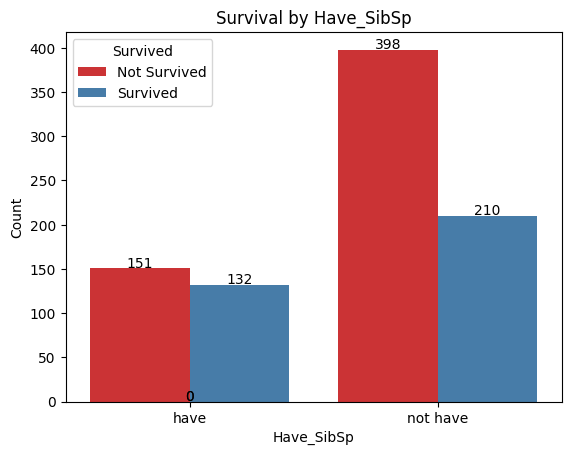

In [29]:
ax = sns.countplot(data=df.assign(Survived=df['Survived'].map({0:'Not Survived', 1:'Survived'})),
                   x='Have_SibSp', hue='Survived', palette='Set1')
plt.title("Survival by Have_SibSp")
plt.xlabel("Have_SibSp")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=int(height),                  
        ha='center'                     
    )

plt.show()

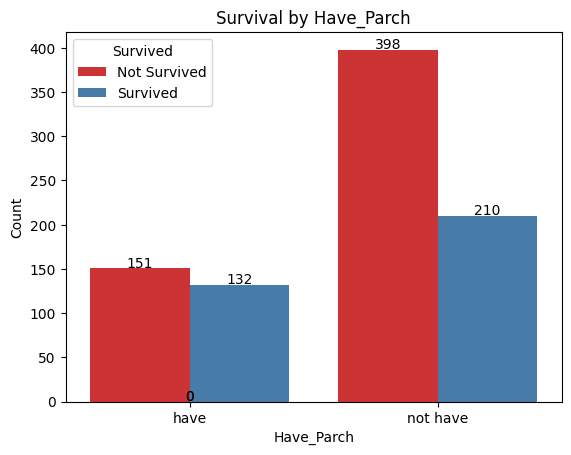

In [30]:
ax = sns.countplot(data=df.assign(Survived=df['Survived'].map({0:'Not Survived', 1:'Survived'}))
                   , x='Have_SibSp', hue='Survived', palette='Set1')
plt.title("Survival by Have_Parch")
plt.xlabel("Have_Parch")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,  
        y=height + 1,                  
        s=int(height),                  
        ha='center'                     
    )

plt.show()

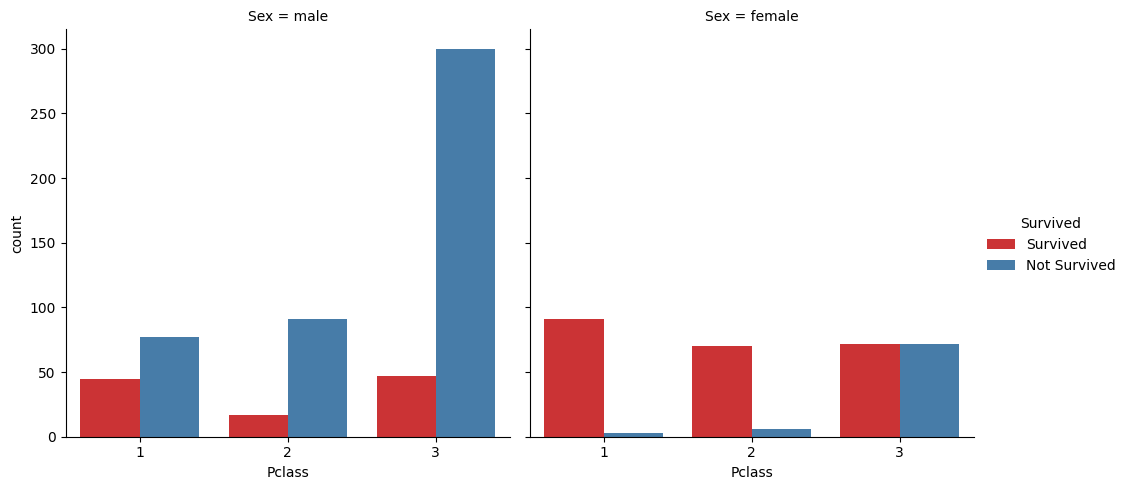

In [31]:
sns.catplot(
    data=df.assign(Survived=df['Survived'].map({0:'Not Survived', 1:'Survived'})),
    x='Pclass',
    hue='Survived',
    col='Sex',         
    kind='count',
    palette='Set1'
)
plt.show()

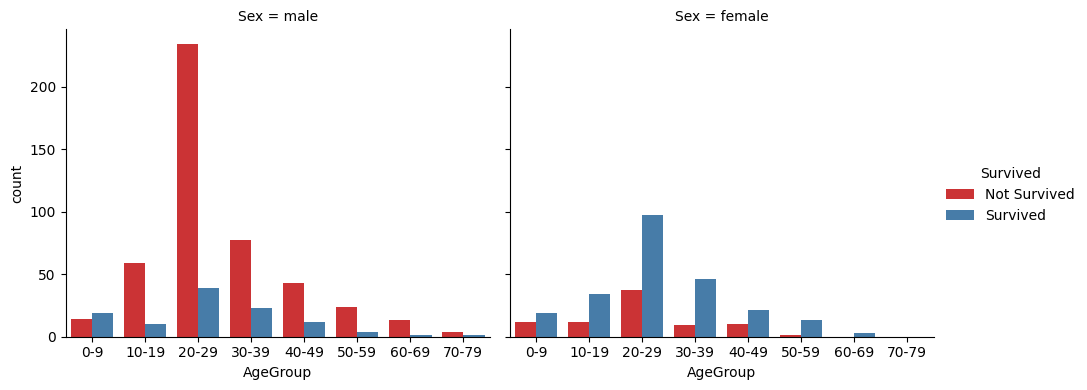

In [32]:
sns.catplot(
    data=df.assign(Survived=df['Survived'].map({0:'Not Survived', 1:'Survived'})),
    x='AgeGroup',
    hue='Survived',
    col='Sex',      
    kind='count',
    palette='Set1',
    height=4,
    aspect=1.2
)
plt.show()

### Numeric Columns

In [33]:
num_col = df.select_dtypes(['int64', 'float64']).columns
num_col

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#### Histogram and KDE

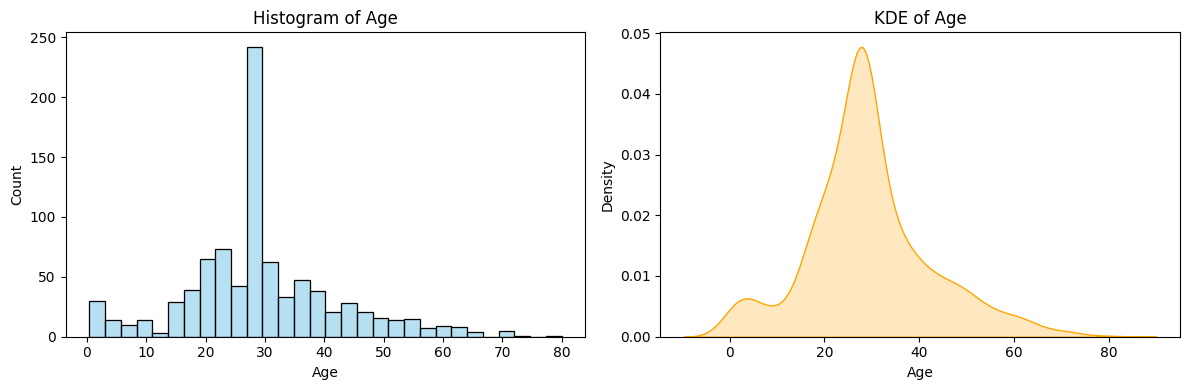

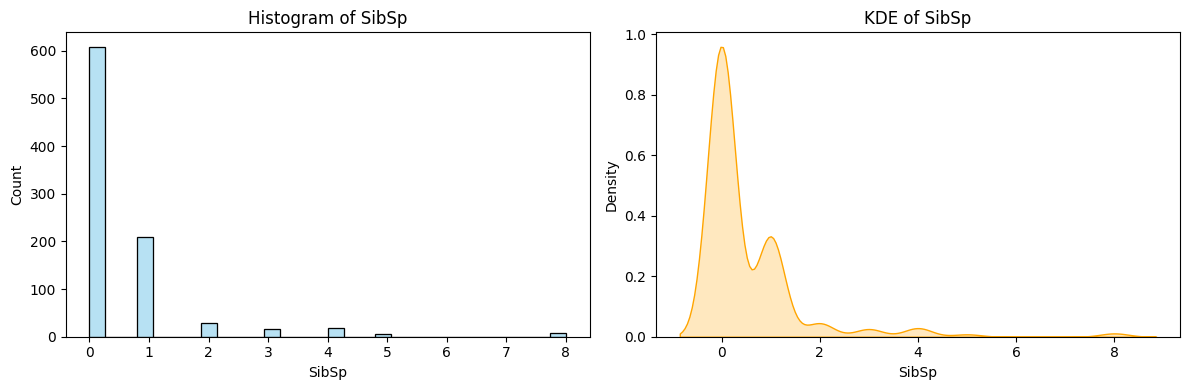

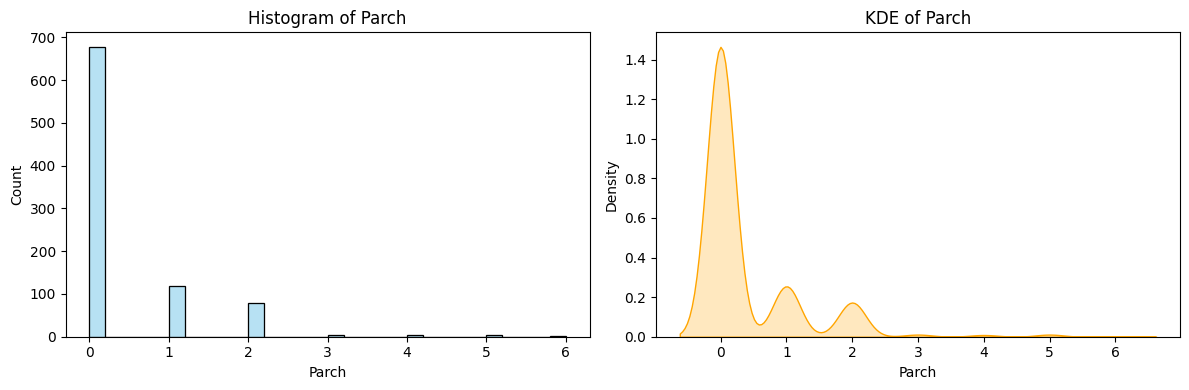

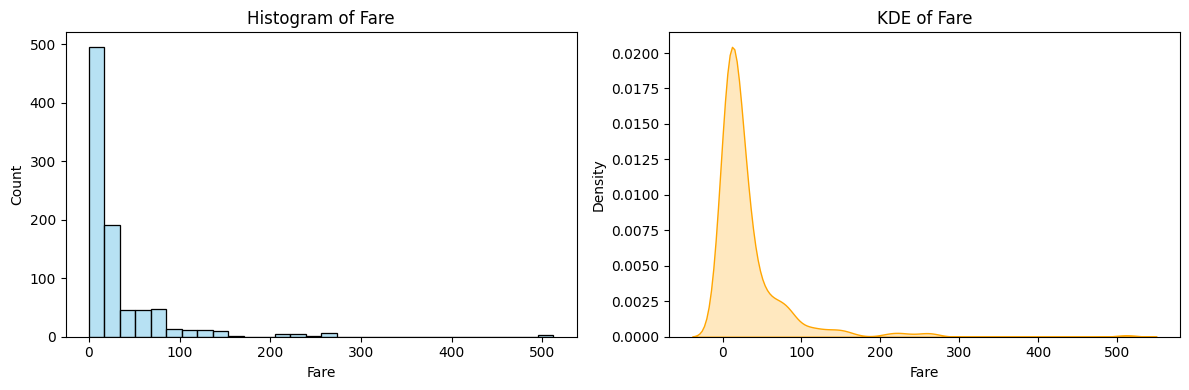

In [34]:
for col in num_col[2:]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
    
    # Histogram 
    sns.histplot(df[col], color='skyblue', bins=30, alpha=0.6, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    
    # KDE plot 
    sns.kdeplot(df[col], fill=True, color='orange', ax=axes[1])
    axes[1].set_title(f"KDE of {col}")
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()


#### Boxplot and Viloin

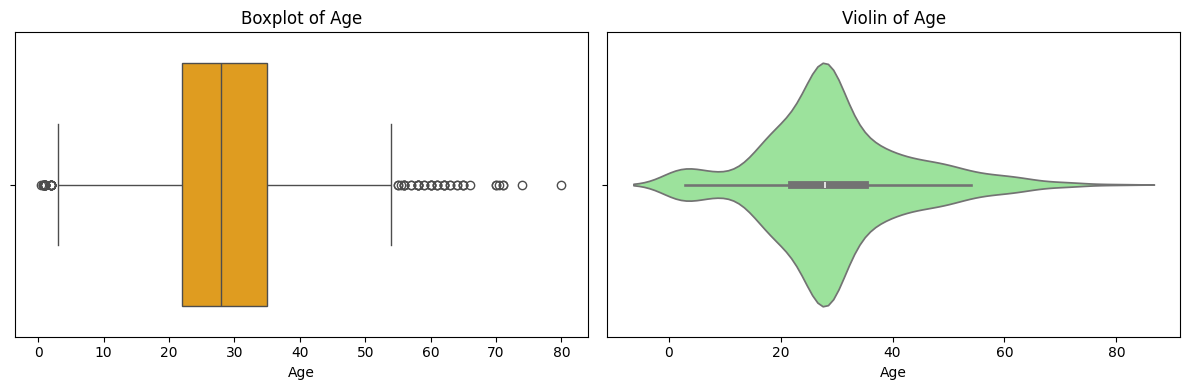

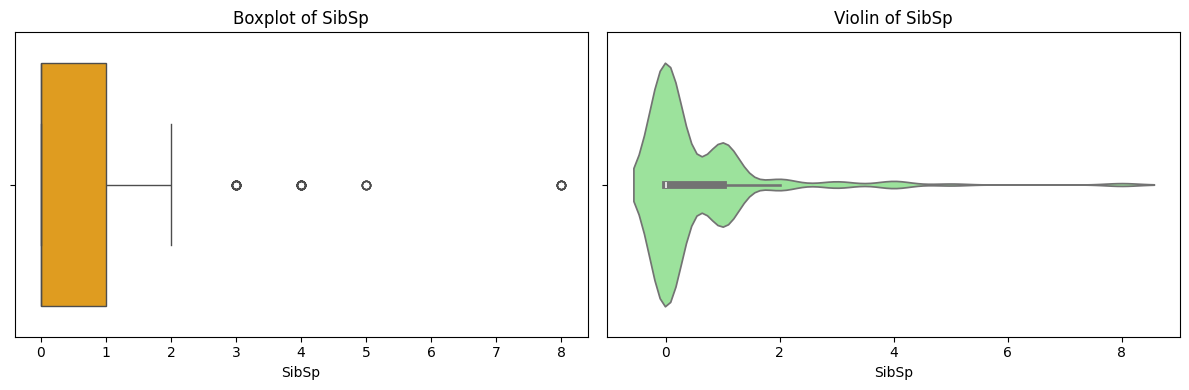

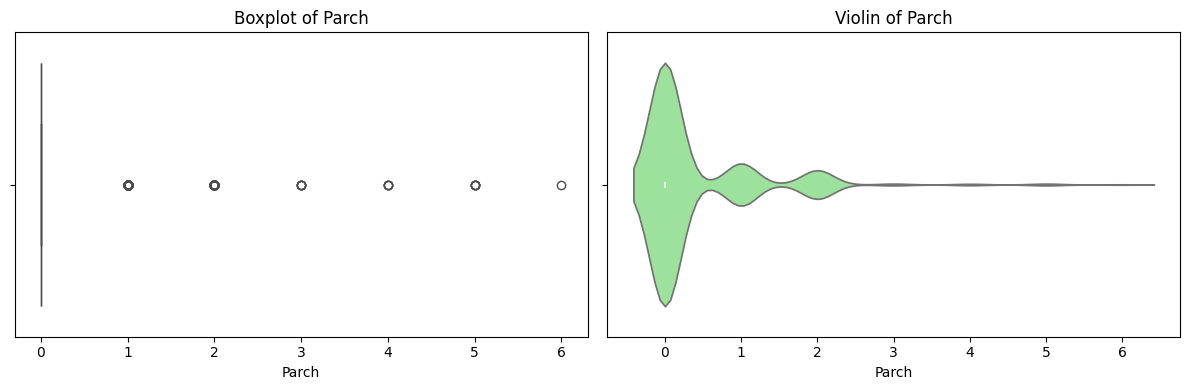

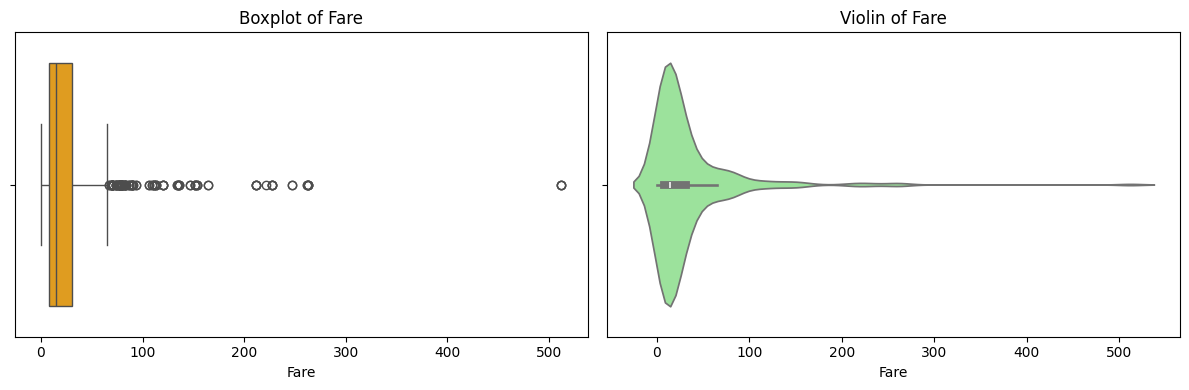

In [35]:
for col in num_col[2:]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
    
    # Boxplot 
    sns.boxplot(x=df[col], color='orange', ax=axes[0])
    axes[0].set_title(f"Boxplot of {col}")
    axes[0].set_xlabel(col)
    
    # Viloin plot 
    sns.violinplot(x=df[col], color='lightgreen', ax=axes[1])
    axes[1].set_title(f"Violin of {col}")
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()


#### Correlation Matrix

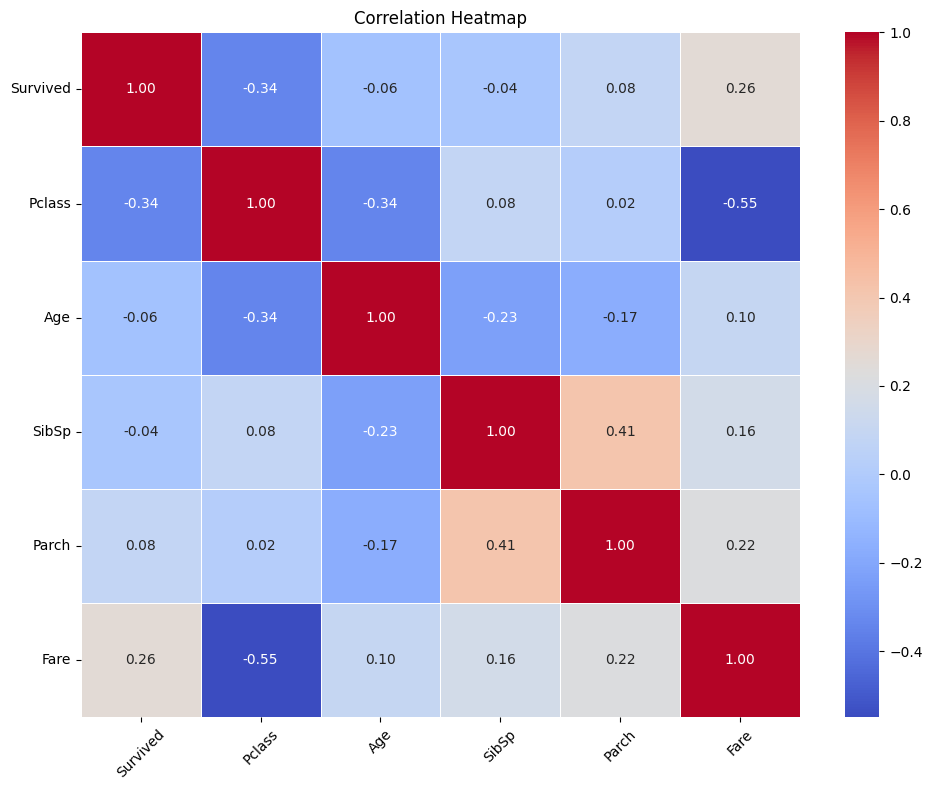

In [36]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    df[num_col].corr(),          
    annot=True,                   
    fmt=".2f",                    
    cmap="coolwarm",             
    cbar=True,                     
    linewidths=0.5,               
    linecolor='white',           
    annot_kws={"size":10}        
)

plt.title("Correlation Heatmap")
plt.xticks(rotation=45)           
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()